In [1]:
import numpy as np
import polynomial_gossip as pg
import matplotlib.pyplot as plt

## Computation of the polynomial over a mesh

In [2]:
def optimal_polynomials(coeffs,T,n_grid):
    pi = np.ones(n_grid)
    pis = np.zeros((T,n_grid))
    pis[0] = pi
    lamb = np.linspace(-1,1,n_grid)
    for t in range(T-1) :
        (a,b,c) = coeffs(t)
        if t == 0:
            pi_new = a*lamb + b*pi
        else :
            pi_new = a*lamb*pi + b*pi - c*pi_prec
        pi_prec = pi
        pi = pi_new
        pis[t+1] = pi
    return pis

In [3]:
T = 7
n_grid = T*100
alpha = 1/2
opts = optimal_polynomials(lambda t: pg.coeffs_Jacobi(1,0,t), T, n_grid)

## Generation of Figure 5

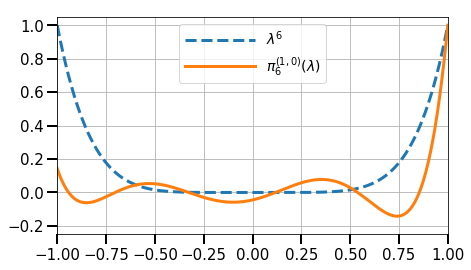

In [4]:
lamb = np.linspace(-1,1,n_grid)

fig, ax = plt.subplots(figsize=(7,4))
linewidth = 3
ax.plot(np.linspace(-1,1,n_grid),lamb**(T-1),linewidth=linewidth,label=r'$\lambda^6$', 
       linestyle = '--')
ax.plot(np.linspace(-1,1,n_grid),opts[-1],linewidth=linewidth,label=r'$\pi_6^{(1,0)}(\lambda)$')
ax.legend(loc='upper center',handlelength=5, fontsize=14)
ax.yaxis.set_tick_params(direction = 'out', length = 10, width = 2,
                         labelsize = 15)
ax.xaxis.set_tick_params(direction = 'out', length = 10, width = 2,
                         labelsize = 15)
ax.grid()

ax.set_xlim(-1,1)
ax.set_ylim(-0.25,1.05)
plt.show()